In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
# plot fig size settings.
plt.rcParams['figure.figsize'] = [16, 9]
import os

# 5.2 Establishing individual weekly electric consumption profiles in 10 temperature bands can set expected consumption and identify anomalies

## 5.2.1 Temperature band has a significant impact on individual building weekly electricity consumption

In [2]:
# import the 15-min time series data.
df = pd.read_csv('290 buildings electricity consumption.csv', parse_dates=True, index_col=0)

In [3]:
df

,AK0001ZZ,AK0013ZZ,AK0031AA,AL0003AC,AL0011ZZ,AL0039AB,AL0076AB,AR0030RK,AR0031ZZ,AR0062ZZ,...,IL0205ZZ,IL0214ZZ,IL0236FC,IL0240ZZ,IL0302ZZ,IL0303ZZ,IL0311ZZ,IL2125ZZ,IN0031ZZ,KY0013ZZ
2018-01-01 00:00:00,11.712,197.84,238.0,NaN,NaN,NaN,75.0,0.773,19.0,1.563,...,317.889,1.631,258.803,4.442,17.609,NaN,40.194,NaN,12.664,19.0
2018-01-01 00:15:00,11.328,165.76,246.0,NaN,NaN,NaN,72.0,0.773,19.0,1.563,...,315.153,1.593,262.737,NaN,17.831,NaN,40.283,NaN,12.104,20.0
2018-01-01 00:30:00,11.328,165.44,240.0,NaN,NaN,NaN,73.0,0.773,NaN,1.563,...,329.446,1.787,261.243,NaN,17.941,NaN,42.650,36.348,12.974,19.0
2018-01-01 00:45:00,11.904,198.16,244.0,NaN,NaN,NaN,71.0,0.773,NaN,1.563,...,326.049,1.528,256.981,4.490,17.707,268.113,40.961,31.291,12.067,18.0
2018-01-01 01:00:00,11.904,212.24,240.0,NaN,NaN,NaN,72.0,0.773,16.5,1.563,...,317.573,1.488,257.217,4.510,17.909,265.057,41.393,33.943,12.810,19.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-30 22:45:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-12-30 23:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-12-30 23:15:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-12-30 23:30:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# import the temperature profiles in 2018.
weathers = pd.read_csv("all bldg temp_C.csv", index_col = 0, parse_dates = True)

In [5]:
# aggregate the time series temperature data by week to get the weekly average temperature
weeklyTemp = weathers.groupby(pd.Grouper(freq='W')).mean()[:-1]

In [6]:
weeklyTemp

,ME0034ZZ,ME0035ZZ,OR0023ZZ,OR0024ZZ,OR0043ZZ,WA0094ZZ,MA0051ZZ,CT0013ZZ,CT0053ZZ,IL0173ZZ,...,IL0303ZZ,IL2125ZZ,IL0054ZZ,IL0154ZZ,IL0200ZZ,IL0240ZZ,IL0214ZZ,IL0302ZZ,IL0311ZZ,IN0031ZZ
Timestamp,,,,,,,,,,,,,,,,,,,,,
2018-01-07,-14.011310,-14.011310,4.969048,4.969048,4.969048,4.969048,-12.208929,-12.208929,-12.208929,-12.958929,...,-13.610714,-13.610714,-13.610714,-14.980368,-8.814286,-8.814286,-13.183333,-16.025595,-16.425000,-13.905357
2018-01-14,-0.597619,-0.597619,8.389881,8.389881,8.389881,8.389881,0.109524,0.109524,0.109524,-0.990476,...,-1.268452,-1.268452,-1.268452,-2.806667,0.572327,0.572327,-2.439881,-1.732500,-3.869643,-0.413095
2018-01-21,-3.525000,-3.525000,8.222024,8.222024,8.222024,8.222024,-2.773214,-2.773214,-2.773214,-2.854167,...,-2.713095,-2.713095,-2.713095,-4.070238,-2.887273,-2.887273,-3.392262,-5.751786,-4.433929,-5.030357
2018-01-28,-1.863095,-1.863095,7.400000,7.400000,7.400000,7.400000,0.670238,0.670238,0.670238,5.327381,...,3.837500,3.837500,3.837500,4.005952,5.806548,5.806548,4.455952,3.494643,1.150595,3.767857
2018-02-04,-4.116071,-4.116071,9.522024,9.522024,9.522024,9.522024,-1.931548,-1.931548,-1.931548,-1.885119,...,-3.774405,-3.774405,-3.774405,-3.404167,-0.571257,-0.571257,-2.743452,-3.468452,-5.757738,-2.430952
2018-02-11,-2.765476,-2.765476,7.553571,7.553571,7.553571,7.553571,-1.790476,-1.790476,-1.790476,-5.525000,...,-8.025595,-8.025595,-8.025595,-8.627976,-1.216364,-1.216364,-7.129878,-6.948810,-11.364881,-6.082738
2018-02-18,0.351190,0.351190,5.648214,5.648214,5.648214,5.648214,2.302381,2.302381,2.302381,2.148810,...,-0.891667,-0.891667,-0.891667,-0.983929,5.236364,5.236364,1.219643,1.305357,-4.114881,0.761905
2018-02-25,3.108982,3.108982,2.014881,2.014881,2.014881,2.014881,6.198802,6.198802,6.198802,6.688690,...,5.345833,5.345833,5.345833,4.860714,10.259639,10.259639,3.649398,6.709524,1.629762,7.272024
2018-03-04,3.994643,3.994643,5.355090,5.355090,5.355090,5.355090,5.986310,5.986310,5.986310,7.993452,...,5.823214,5.823214,5.823214,7.145833,8.413253,8.413253,7.957738,5.960119,4.264286,4.761310


In [7]:
# import the building profiles (static attributes)
profiles = pd.read_csv('GSA building profiles.csv', index_col = 0)

In [6]:
# There are 49 buildings missing over 40% of datapoints, we are going to exclude them for the correlation analysis.
excludes = (df.isna().sum() / 34944 * 100)
excludes = excludes[excludes>=40]
len(excludes)

49

In [5]:
# aggregate the daily consumptions into weekly consumption
weeklyConsumptions = df.resample('1W').sum().replace(0, np.nan)

In [7]:
# excludes the buildings with data loss >40%
weeklyConsumptions = weeklyConsumptions[weeklyConsumptions.columns[~weeklyConsumptions.columns.isin(excludes.index)]]

In [8]:
# set the display. default cols,rows = 20, 60
pd.set_option("max_columns", 10)
pd.set_option("max_rows", 20)

In [9]:
weeklyConsumptions

,AK0001ZZ,AK0013ZZ,AK0031AA,AL0076AB,AR0030RK,...,IL0302ZZ,IL0303ZZ,IL0311ZZ,IL2125ZZ,IN0031ZZ
2018-01-07,10199.616,129859.60,207964.0,66013.0,479.263,...,12922.393,169157.591,35969.045,27734.750,11621.786
2018-01-14,10293.120,134968.24,221876.0,72318.0,515.232,...,10924.840,115555.414,36492.905,24072.677,11132.429
2018-01-21,9846.144,126409.68,208288.0,45618.0,458.166,...,10857.581,125752.553,32625.558,23826.000,10950.023
2018-01-28,10049.856,151740.96,224372.0,51706.0,456.908,...,9820.563,106762.830,31989.655,20383.064,11038.035
2018-02-04,10014.720,168404.96,228266.0,55325.0,448.170,...,9875.428,135017.470,36087.512,24540.817,11667.031
...,...,...,...,...,...,...,...,...,...,...,...
2018-12-02,10227.648,54157.12,197684.0,34408.0,562.987,...,9032.883,116539.755,31902.340,19789.643,11543.430
2018-12-09,4738.944,23690.55,95542.0,12087.0,243.723,...,2858.831,31039.301,10136.140,5759.629,3579.133
2018-12-16,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN
2018-12-23,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN


In [10]:
# the oneway ANOVA on single building.
def tempbandImpactOnSingleBuilding(bldgCode):
    weeklyConsumptionsUnderAllTempband = []
    for (lo, hi) in [(-10,-5), (-5, 0), (0, 5), (5, 10), (10, 15), (15, 20), (20, 25), (25, 30), (30,35), (35,100)]:
        temps = weeklyTemp[bldgCode][(weeklyTemp[bldgCode] > lo) & (weeklyTemp[bldgCode] <= hi)]
        if len(temps) != 0:
            weeklyConsumptionsUnderAllTempband.append(temps.to_list())

    fvalue, pvalue = stats.f_oneway(*weeklyConsumptionsUnderAllTempband)
    count = len(weeklyConsumptionsUnderAllTempband)
    return pvalue, count

In [15]:
# perform oneway ANOVA for each building.
pvalues = []
counts = []
for c in weeklyConsumptions.columns:
    p, count = tempbandImpactOnSingleBuilding(c)
    pvalues.append(p)
    counts.append(count)

In [16]:
# save the pvalues.
d = {'pvalue': pvalues, 'count': counts}
df_pvalue = pd.DataFrame(data = d, index=weeklyConsumptions.columns)

In [17]:
df_pvalue.pvalue

AK0001ZZ    2.017500e-33
AK0013ZZ    1.721043e-31
AK0031AA    2.017500e-33
AL0076AB    9.832246e-36
AR0030RK    3.491662e-36
                ...     
IL0302ZZ    3.532673e-40
IL0303ZZ    3.813231e-38
IL0311ZZ    7.327904e-36
IL2125ZZ    3.813231e-38
IN0031ZZ    1.060596e-36
Name: pvalue, Length: 241, dtype: float64

In [18]:
# all the buildings have a p-value lower than 0.05
(df_pvalue.pvalue < 0.05).sum()

241

## 5.2.2 Individual weekly electric consumption profiles help identify anomalies and set expected consumption

In [71]:
# how to set an individual weekly profile.

# preprocess df to exclude holiday data.
for d in ['2018-1-1', '2018-1-15', '2018-2-19', '2018-5-28', '2018-7-4', '2018-9-3', '2018-10-8', '2018-11-12', '2018-11-22', '2018-12-5']:
    df.loc[d] = np.nan

    
# need to load profiles, df, weeklyTemp

# function to get the building weekly profile given building code and temperature bands.
def getBuildingWeeklyProfile(bldgCode, low_temp, high_temp):
    
    floorArea = profiles.loc[bldgCode].Area
    bldg = df[bldgCode]
    weeklyAvgTemp = weeklyTemp[bldgCode]

    # select temperature band.
    weeks = weeklyAvgTemp[(weeklyAvgTemp.values > low_temp) & (weeklyAvgTemp.values <= high_temp)].index.isocalendar().week.to_list()
    
    # create a datetime index for year 2018
    # use 12-30 as end date because 12-31 is Monday
    index_2018 = pd.DatetimeIndex(pd.date_range(start='2018', end='2018-12-30 23:45', freq="15MIN"))

    holidays = [pd.to_datetime(s).day for s in ['2018-1-1', '2018-1-15', '2018-2-19', '2018-5-28', '2018-7-4', '2018-9-3', '2018-10-8', '2018-11-12', '2018-11-22', '2018-12-5']]

    all_weeks = []
    for w in weeks:
        that_week = bldg.loc[bldg.index.isocalendar().week == w]
        
        # in case the weekly data is incomplete
        # that_week = that_week.reindex(index_2018[index_2018.isocalendar().week == w])
        
        that_week.index = that_week.index.strftime("%a-%H:%M")
        # rename the series 
        all_weeks.append(that_week.rename(w))

        
    if len(weeks) == 0:
        print(f'{bldgCode} has no weeks in selected temperature band.[{low_temp}, {high_temp}]')
        return pd.Series([np.nan]*672, index=pd.date_range(start='2018-1-1', end='2018-1-7 23:45', freq="15MIN").strftime("%a-%H:%M")).rename(bldgCode)
    
    
    concated = pd.concat(all_weeks, axis = 1)
    
    # removing all values < 1
    concated[concated < 1] = np.nan
    
    # convert unit to be eui.
    concated = concated / floorArea

    # clean the outliers using iqr methods
    iqr = concated.quantile(q=0.75, axis=1) - concated.quantile(q=0.25, axis=1)
    lb = concated.quantile(q=0.25, axis=1) - 1.5 * iqr
    rb = concated.quantile(q=0.75, axis=1) + 1.5 * iqr
    
    for w in concated.columns:
        concated.loc[((concated[w]>rb) | (concated[w]<lb)), w] = np.nan
        
    return concated

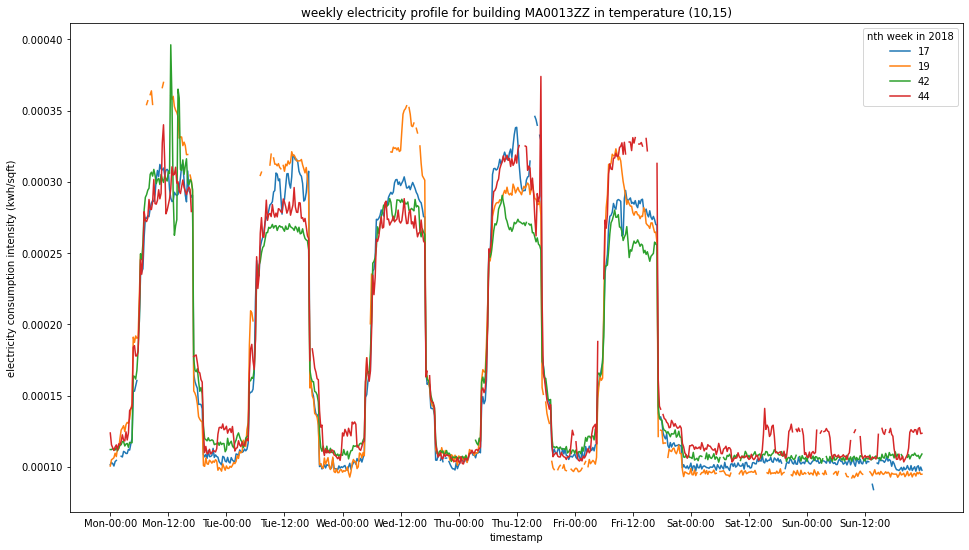

In [72]:
# example: the weekly profile of MA0013ZZ in temperature between 10C and 15C.
fig, ax = plt.subplots()
ax.set_xticks(np.arange(0, 96*7, 48))

getBuildingWeeklyProfile('MA0013ZZ', 10, 15).plot(ax=ax)

ax.set_xlabel('timestamp')
ax.set_ylabel('electricity consumption intensity (kwh/sqft)')
ax.set_title('weekly electricity profile for building MA0013ZZ in temperature (10,15)')
ax.legend(title='nth week in 2018')

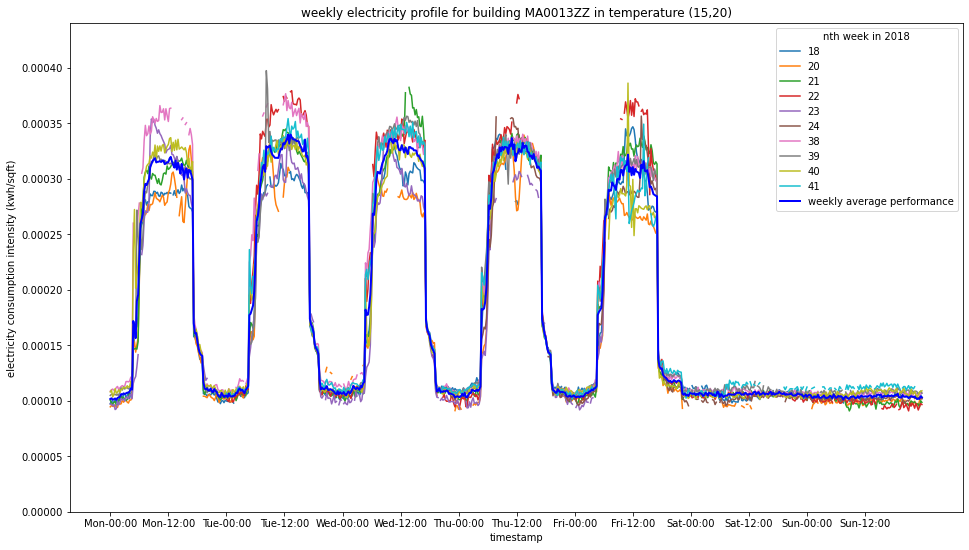

In [38]:
# example: the weekly profile of MA0013ZZ in temperature between 10C and 15C, along the average performance in the temperature.
fig, ax = plt.subplots()
ax.set_xticks(np.arange(0, 96*7, 48))

weeklyProfile = getBuildingWeeklyProfile('MA0013ZZ', 15, 20)
weeklyProfile.plot(ax = ax)
weeklyProfile.mean(axis=1).rename('weekly average performance').plot(ax = ax, legend=True, linewidth=2, c='blue')

ax.set_ylim(0)
ax.set_xlabel('timestamp')
ax.set_ylabel('electricity consumption intensity (kwh/sqft)')
ax.set_title('weekly electricity profile for building MA0013ZZ in temperature (15,20)')
ax.legend(title='nth week in 2018')

# 5.3 Individual weekly electric consumption profiles can be used as reference to correct abnormal patterns detected.

In [141]:
from pyts.approximation import SymbolicAggregateApproximation
from scipy.stats import norm

In [ ]:
# import 15-min time series dataset.
df = pd.read_csv('290 buildings electricity consumption.csv', parse_dates=True, index_col=0)

## 5.3.1 Step-by-step guide for abnormal pattern detection using SAX (Here using one building as example.)

### Step 1: Data preprocessing

In [129]:
df_target_original = df['MA0131ZZ']
df_target = df['MA0131ZZ']

In [130]:
m = df_target.mean()
std = df_target.std()

In [131]:
df_target[(df_target > m+3*std) | (df_target < m-3*std)] = np.nan

In [132]:
m = df_target.mean()
std = df_target.std()

In [133]:
# z-normalization
df_target = (df_target - m) / std

In [134]:
df_target

2018-01-01 00:00:00   NaN
2018-01-01 00:15:00   NaN
2018-01-01 00:30:00   NaN
2018-01-01 00:45:00   NaN
2018-01-01 01:00:00   NaN
                       ..
2018-12-30 22:45:00   NaN
2018-12-30 23:00:00   NaN
2018-12-30 23:15:00   NaN
2018-12-30 23:30:00   NaN
2018-12-30 23:45:00   NaN
Name: MA0131ZZ, Length: 34944, dtype: float64

In [135]:
# a daily profile is truncated into 4 trunks.
df_target_resampled = df_target.resample('6H').mean()

In [136]:
df_target_resampled

2018-01-01 00:00:00        NaN
2018-01-01 06:00:00        NaN
2018-01-01 12:00:00        NaN
2018-01-01 18:00:00        NaN
2018-01-02 00:00:00   -0.31328
                        ...   
2018-12-29 18:00:00        NaN
2018-12-30 00:00:00        NaN
2018-12-30 06:00:00        NaN
2018-12-30 12:00:00        NaN
2018-12-30 18:00:00        NaN
Freq: 6H, Name: MA0131ZZ, Length: 1456, dtype: float64

In [137]:
# if there is a nan value in one day, the whole day data should be dropped because SAX dont accept null values.
for d in pd.date_range(start='2018', end='2018-12-30'):
    that_day = df_target_resampled.loc[d.strftime('%Y-%m-%d')]
    if that_day.isna().sum() != 0:
        df_target_resampled = df_target_resampled.drop(labels=pd.date_range(start=d, periods=4, freq='6H'))
        print('dropped:', d.strftime('%Y-%m-%d'))

dropped: 2018-01-01
dropped: 2018-01-15
dropped: 2018-02-19
dropped: 2018-05-28
dropped: 2018-07-04
dropped: 2018-08-19
dropped: 2018-08-20
dropped: 2018-08-22
dropped: 2018-08-23
dropped: 2018-09-03
dropped: 2018-10-08
dropped: 2018-11-12
dropped: 2018-11-22
dropped: 2018-12-04
dropped: 2018-12-05
dropped: 2018-12-06
dropped: 2018-12-07
dropped: 2018-12-08
dropped: 2018-12-09
dropped: 2018-12-10
dropped: 2018-12-11
dropped: 2018-12-12
dropped: 2018-12-13
dropped: 2018-12-14
dropped: 2018-12-15
dropped: 2018-12-16
dropped: 2018-12-17
dropped: 2018-12-18
dropped: 2018-12-19
dropped: 2018-12-20
dropped: 2018-12-21
dropped: 2018-12-22
dropped: 2018-12-23
dropped: 2018-12-24
dropped: 2018-12-25
dropped: 2018-12-26
dropped: 2018-12-27
dropped: 2018-12-28
dropped: 2018-12-29
dropped: 2018-12-30


### Step 2: Symbolic Aggregate approXimation (SAX) transformation for daily profile

In [138]:
# Parameters
n_samples, n_timestamps = len(df_target_resampled) // 4, 4
X = np.zeros((n_samples, n_timestamps))
for i in range(len(X)):
    X[i] = df_target_resampled.iloc[i * n_timestamps: (i+1) * n_timestamps].to_numpy()

In [142]:
# SAX transformation, using the vocabulary size of 3 (a,b,c)
n_bins = 3
sax = SymbolicAggregateApproximation(n_bins=n_bins, strategy='normal')
X_sax = sax.fit_transform(X)

# Compute gaussian bins
bins = norm.ppf(np.linspace(0, 1, n_bins + 1)[1:-1])

In [143]:
X_sax

array([['b', 'c', 'c', 'b'],
       ['b', 'c', 'c', 'a'],
       ['a', 'c', 'c', 'a'],
       ...,
       ['a', 'a', 'a', 'a'],
       ['a', 'a', 'a', 'a'],
       ['a', 'c', 'c', 'a']], dtype='<U1')

In [144]:
X_str = [''.join(elem) for elem in X_sax]

In [145]:
pattern = pd.Series(X_str, index=df_target_resampled.resample('1D').max().dropna().index)

In [146]:
# the daily load pattern for the building.
pattern

2018-01-02    bccb
2018-01-03    bcca
2018-01-04    acca
2018-01-05    bccb
2018-01-06    bbbb
              ... 
2018-11-29    acca
2018-11-30    acca
2018-12-01    aaaa
2018-12-02    aaaa
2018-12-03    acca
Length: 324, dtype: object

### Step 3: Label the abnormal daily patterns

In [147]:
for p in pattern.unique():
    print(p, (pattern == p).sum() )

bccb 2
bcca 30
acca 180
bbbb 3
bbaa 1
aaba 3
aaaa 68
accb 2
abba 12
acba 2
abaa 3
aaab 2
ccca 7
bccc 2
cccc 4
accc 1
acbb 1
abbb 1


In [ ]:
# the pattern bccc occurred rarely in 2018, which might be an abnormal pattern
# see the days with a load pattern of 'bccc'
pattern[pattern == 'bccc']

2018-07-05    bccc
2018-08-28    bccc
dtype: object

(0.0, 690.3731499999999)

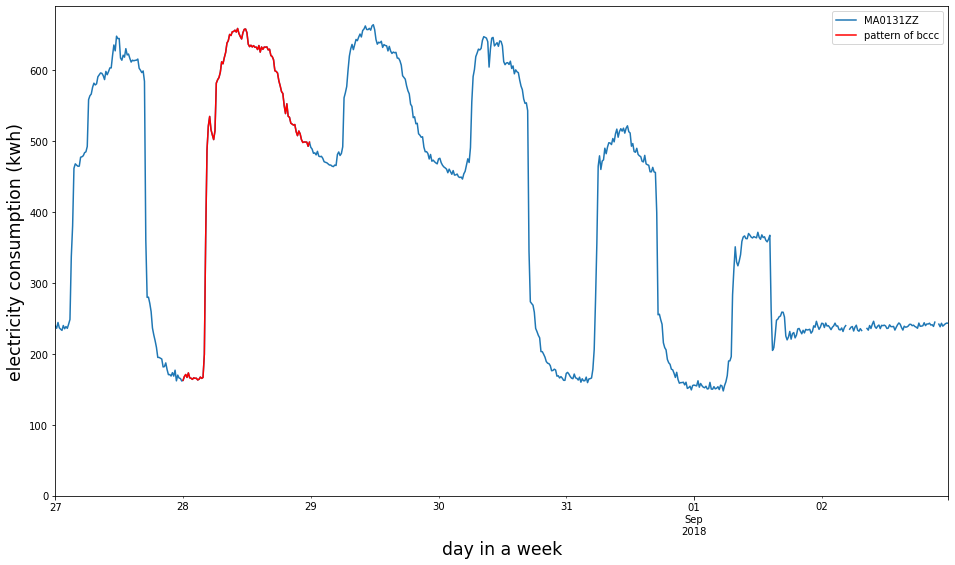

In [67]:
# 2018-8-28 is one day with a load pattern of 'bccc'
# let's take a look at that week

fig, ax = plt.subplots()

d = '2018-08-28'
w = pd.to_datetime(d).week
df_target_original[df_target_original.index.isocalendar().week == w].plot(ax = ax, legend=True)


# find out the abnormal pattern
df_target_original['2018-08-28'][0*24:4*24].plot(ax = ax, label = 'pattern of bccc', c = 'red', legend=True)
# df_target_original['2018-08-29'][3*24:4*24].plot(ax = ax, c = 'red', legend=False)
# df_target_original['2018-08-29'][0*24:1*24].plot(ax = ax, c = 'red', legend=False)
# df_target_original['2018-08-30'][0*24:1*24].plot(ax = ax, c = 'red', legend=False)

ax.set_ylabel('electricity consumption (kwh)', {'fontsize':'xx-large'})
ax.set_xlabel('day in a week', {'fontsize':'xx-large'})
ax.set_ylim(0)

In [69]:
# actually not only 2018-8-28, some other days in that week also have rare patterns
# 'bccc', 'cccc', 'ccca' are the patterns indicate high consumption during unoccupied time.
# 'bbbb' is the pattern indicates high setback load during unoccupied time.
pattern.loc[pattern.index.isocalendar().week == w]

2018-08-27    bcca
2018-08-28    bccc
2018-08-29    cccc
2018-08-30    ccca
2018-08-31    acca
2018-09-01    abbb
2018-09-02    bbbb
dtype: object

(0.0, 690.3731499999999)

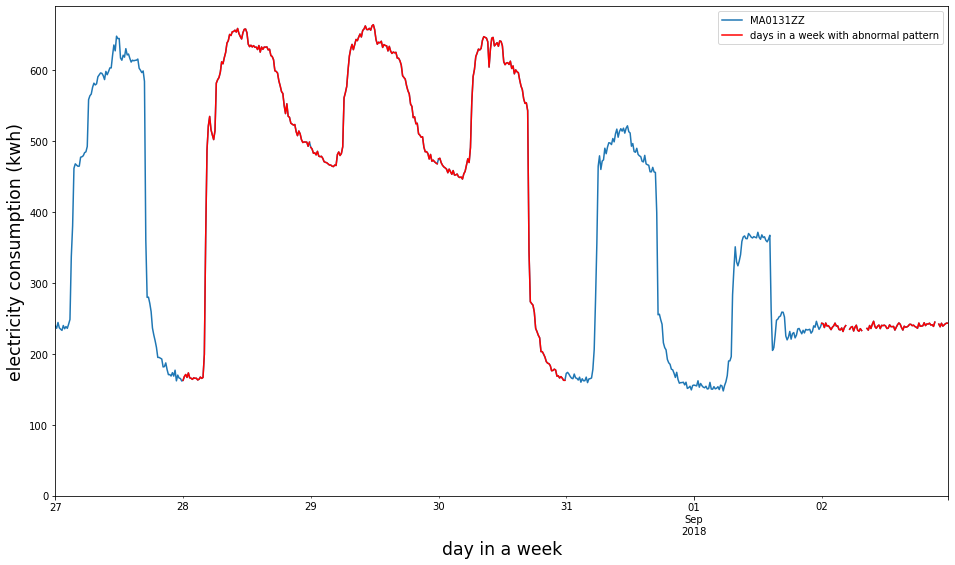

In [71]:
# Mark more abnormal patterns in that week.

fig, ax = plt.subplots()

d = '2018-08-28'
w = pd.to_datetime(d).week
df_target_original[df_target_original.index.isocalendar().week == w].plot(ax = ax, legend=True)


# find out the abnormal pattern
df_target_original['2018-08-28'][0*24:4*24].plot(ax = ax, label = 'days in a week with abnormal pattern', c = 'red', legend=True)
df_target_original['2018-08-29'][0*24:4*24].plot(ax = ax, c = 'red', legend=False)
df_target_original['2018-08-30'][0*24:4*24].plot(ax = ax, c = 'red', legend=False)
df_target_original['2018-09-02'][0*24:4*24].plot(ax = ax, c = 'red', legend=False)

ax.set_ylabel('electricity consumption (kwh)', {'fontsize':'xx-large'})
ax.set_xlabel('day in a week', {'fontsize':'xx-large'})
ax.set_ylim(0)

# 5.4 Mentor buildings can be established in each ASHRAE climate zone to set goals for 10 temperature bands to significantly reduce daytime, nighttime and weekend loads.

## 5.4.1 Step-by-step guide for selecting the regional mentor building

In [8]:
# import the temperature profiles in 2018.
weathers = pd.read_csv("all bldg temp_C.csv", index_col = 0, parse_dates = True)

In [9]:
# aggregate the time series temperature data by week to get the weekly average temperature
weeklyTemp = weathers.groupby(pd.Grouper(freq='W')).mean()[:-1]

In [10]:
# import the building profiles (static attributes)
profiles = pd.read_csv('GSA building profiles.csv', index_col = 0)

### Step 1: Identify the dominant temperature bands in the climate zone (Here take climate zone 5A as example)

In [11]:
bldgs_5A = profiles[profiles['Climate Zone'] == '5A'].index
weeklyTemp = weeklyTemp[bldgs_5A]

In [12]:
allbands = []
for weatherCode in weeklyTemp.columns:
    weatherDistribution = pd.value_counts(pd.cut(weeklyTemp[weatherCode], 
                                                 bins=[-100, -10, -5, 0, 5, 10, 15, 20, 25, 30, 35, 100],
                                                 labels = ['-100--10', '-10--5', '-5-0', '0-5', '5-10', '10-15', '15-20', '20-25', '25-30', '30-35', '35-100']), 
                                          sort=False)
    allbands.append(weatherDistribution)
    
pd.concat(allbands, axis=1)

,CT0013ZZ,CT0024ZZ,CT0053ZZ,CT0059ZZ,CT0061ZZ,IA0027ZZ,IA0030ZZ,IA0087ZZ,IA0112ZZ,IA0119ZZ,...,OH0215ZZ,OH0301ZZ,OH0302ZZ,PA0000ER,PA0000NC,PA0158ZZ,PA0233ZZ,PA0267ZZ,RI0009ZZ,RI0010ZZ
-100--10,1,0,1,0,0,2,2,2,2,2,...,1,1,1,1,1,1,1,1,1,1
-10--5,0,1,0,1,1,0,2,5,2,3,...,0,0,0,1,0,0,0,0,0,0
-5-0,6,2,6,2,2,7,9,9,9,10,...,8,6,8,7,8,7,7,3,2,2
0-5,11,14,11,14,14,12,8,8,8,6,...,12,13,12,13,11,11,11,13,15,15
5-10,8,8,8,8,8,6,7,4,7,6,...,7,8,7,6,7,6,6,7,8,8
10-15,3,4,3,4,4,3,3,3,3,4,...,0,1,0,1,2,3,3,4,3,3
15-20,10,9,10,9,9,2,2,5,2,4,...,9,5,9,7,9,6,6,7,11,11
20-25,12,10,12,10,10,18,14,15,14,16,...,15,16,15,16,14,17,17,13,10,10
25-30,1,4,1,4,4,2,5,1,5,1,...,0,2,0,0,0,1,1,4,2,2
30-35,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


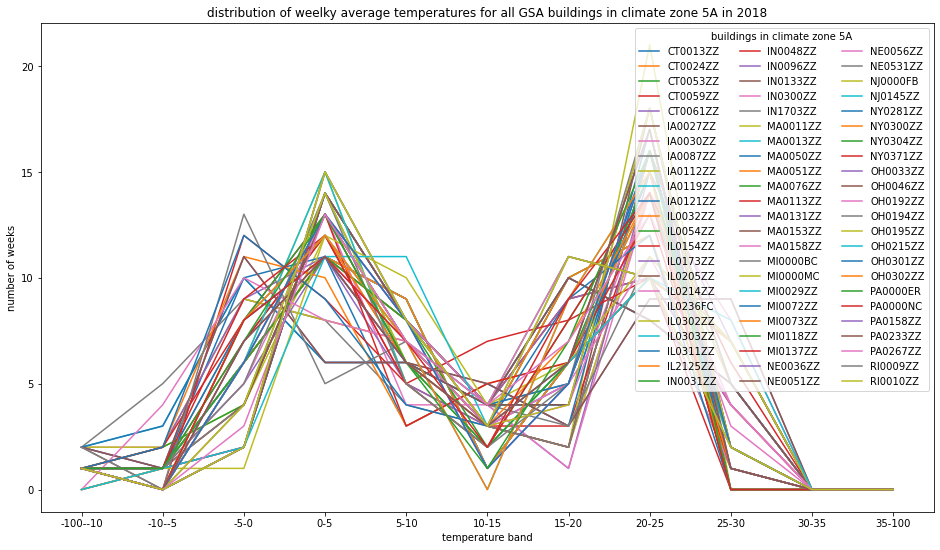

In [13]:
fig = plt.figure()
ax = fig.add_subplot(111)

pd.concat(allbands, axis=1).plot(ax=ax, xticks=np.arange(11))
ax.set_title('distribution of weelky average temperatures for all GSA buildings in climate zone 5A in 2018')
ax.set_xlabel('temperature band')
ax.set_ylabel('number of weeks')
ax.set_xticks(np.arange(11))
ax.legend(loc=1, ncol=3, title="buildings in climate zone 5A")

[Text(0, 0, '<-10'),
 Text(1, 0, '-10~-5'),
 Text(2, 0, '-5~0'),
 Text(3, 0, '0~5'),
 Text(4, 0, '5~10'),
 Text(5, 0, '10~15'),
 Text(6, 0, '15~20'),
 Text(7, 0, '20~25'),
 Text(8, 0, '25~30'),
 Text(9, 0, '30~35'),
 Text(10, 0, '>35')]

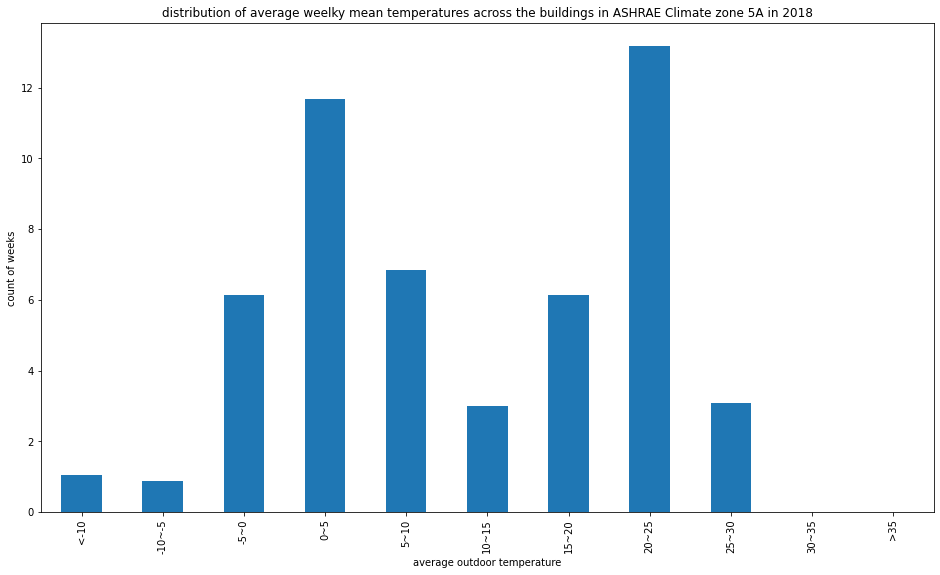

In [14]:
fig, ax = plt.subplots()

pd.concat(allbands, axis=1).mean(axis=1).plot.bar(ax=ax)
ax.set_title('distribution of average weelky mean temperatures across the buildings in ASHRAE Climate zone 5A in 2018')
ax.set_ylabel('count of weeks')
ax.set_xlabel('average outdoor temperature')
ax.set_xticklabels(['<-10', '-10~-5', '-5~0','0~5','5~10','10~15','15~20','20~25','25~30','30~35','>35'])

In [15]:
# assign weights to temperature bands according to their frequency.
temp_rank = pd.concat(allbands, axis=1).mean(axis=1) / 52 * 100

In [16]:
temp_rank

-100--10     2.034560
-10--5       1.672241
-5-0        11.789298
0-5         22.491639
5-10        13.154961
10-15        5.769231
15-20       11.817168
20-25       25.334448
25-30        5.936455
30-35        0.000000
35-100       0.000000
dtype: float64

### Step 2: Determine electricity performance metrics for evaluation

In [17]:
weekday_peakload_ranks = []
weekday_baseload_ranks = []
weekend_peakload_ranks = []
weekend_baseload_ranks = []
for (lo, hi) in [(-10,-5), (-5, 0), (0, 5), (5, 10), (10, 15), (15, 20), (20, 25), (25, 30), (30,35), (35,100)]:
    # import saved csv.
    concated = pd.read_csv(f'5A building average weekly performance/{lo}-{hi}.csv', parse_dates=True, index_col=0)

    # reverse the ranking
    weekday_peakload_rank = ((1 - concated[:96*5].quantile(0.95).rank(pct=True)) * len(concated.columns) + 1).rename(f'{lo}-{hi}')
    weekday_baseload_rank = ((1 - concated[:96*5].quantile(0.15).rank(pct=True)) * len(concated.columns) + 1).rename(f'{lo}-{hi}')
    weekend_peakload_rank = ((1 - concated[96*5:96*7].quantile(0.95).rank(pct=True)) * len(concated.columns) + 1).rename(f'{lo}-{hi}')
    weekend_baseload_rank = ((1 - concated[96*5:96*7].quantile(0.15).rank(pct=True)) * len(concated.columns) + 1).rename(f'{lo}-{hi}')    
    
    weekday_peakload_ranks.append(weekday_peakload_rank)
    weekday_baseload_ranks.append(weekday_baseload_rank)
    weekend_peakload_ranks.append(weekend_peakload_rank)
    weekend_baseload_ranks.append(weekend_baseload_rank)

In [18]:
concat_weekday_peakload = pd.concat(weekday_peakload_ranks, axis=1)
concat_weekday_baseload = pd.concat(weekday_baseload_ranks, axis=1)
concat_weekend_peakload = pd.concat(weekend_peakload_ranks, axis=1)
concat_weekend_baseload = pd.concat(weekend_baseload_ranks, axis=1)

### Step 3: Quantify the electric performance

In [19]:
# calculate metric performance score
for col in concat_weekday_peakload.columns:
    concat_weekday_peakload[col] = np.log10(concat_weekday_peakload[col]) * temp_rank[col] / 100
    concat_weekday_baseload[col] = np.log10(concat_weekday_baseload[col]) * temp_rank[col] / 100
    concat_weekend_peakload[col] = np.log10(concat_weekend_peakload[col]) * temp_rank[col] / 100
    concat_weekend_baseload[col] = np.log10(concat_weekend_baseload[col]) * temp_rank[col] / 100

In [20]:
concat_weekday_peakload

,-10--5,-5-0,0-5,5-10,10-15,15-20,20-25,25-30,30-35,35-100
CT0013ZZ,NaN,0.205716,0.391436,0.228714,0.102395,0.204264,0.426785,0.097735,NaN,NaN
CT0024ZZ,0.027577,0.196375,0.367394,0.210117,0.096467,0.196839,0.419523,0.096935,NaN,NaN
CT0053ZZ,NaN,0.212792,0.404701,0.236609,0.104503,0.215722,0.462479,0.108517,NaN,NaN
CT0059ZZ,0.023261,0.159701,0.318251,0.179933,0.086296,0.174272,0.377350,0.090511,NaN,NaN
CT0061ZZ,NaN,0.170199,0.321937,0.177392,0.074831,0.152544,0.300980,0.047906,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
PA0158ZZ,NaN,0.203782,0.384061,0.225448,0.101951,0.208978,0.449936,0.104607,NaN,NaN
PA0233ZZ,NaN,0.172063,0.325490,0.189099,0.081721,0.160078,0.348084,0.073399,NaN,NaN
PA0267ZZ,NaN,0.146480,0.264522,0.147309,0.063283,0.093216,0.179677,0.033772,NaN,NaN
RI0009ZZ,NaN,0.207579,0.394925,0.234735,0.102831,0.203267,0.431373,0.101399,NaN,NaN


In [21]:
# For the overall score, the weights of 0.25, 0.25, 0.4, 0.1 are assigned to 
# the weekday daytime load, weekday night time load, weekend daytime load, weekend night time load, respectively.
concat_overall_perf = (concat_weekday_peakload.sum(axis=1)* 0.25 
                     + concat_weekday_baseload.sum(axis=1)* 0.25 
                     + concat_weekend_peakload.sum(axis=1)* 0.4 
                     + concat_weekend_baseload.sum(axis=1)* 0.1)

In [22]:
mentors_byRank = concat_overall_perf.nlargest(8)

In [23]:
# 8 mentor building candidates are selected according to the rank.
mentors_byRank

NE0036ZZ    1.789405
OH0194ZZ    1.774551
CT0053ZZ    1.750196
IA0121ZZ    1.728806
IN0133ZZ    1.697068
MI0029ZZ    1.693109
OH0046ZZ    1.673975
MI0137ZZ    1.672291
dtype: float64

### Step 4: Select the best buildings and establish the mentor building

In [24]:
## import kmeans
from scipy.cluster.vq import kmeans, vq

In [25]:
y = mentors_byRank.to_numpy()
codebook, _ = kmeans(y, 3)  # three clusters
cluster_indices, _ = vq(y, codebook)

In [26]:
# helper function
min2indice = {
    y[cluster_indices == i].min(): i for i in range(3)
}
tier2indice = {
    i: min2indice[v] for i,v in enumerate(reversed(sorted(min2indice)))
}

In [27]:
tier1_group = y[cluster_indices == tier2indice[0]]
tier2_group = y[cluster_indices == tier2indice[1]]
tier3_group = y[cluster_indices == tier2indice[2]]

In [28]:
# divide the 8 mentors into 3 tiers.
tier1 = mentors_byRank[mentors_byRank.isin(tier1_group)].index
tier2 = mentors_byRank[mentors_byRank.isin(tier2_group)].index
tier3 = mentors_byRank[mentors_byRank.isin(tier3_group)].index

In [29]:
tier3

Index(['IN0133ZZ', 'MI0029ZZ', 'OH0046ZZ', 'MI0137ZZ'], dtype='object')

In [30]:
# the best building in tier 3 is our mentor
mentor = tier3[0]

Text(480, 5.305017797155935e-05, 'weekend nighttime load goal')

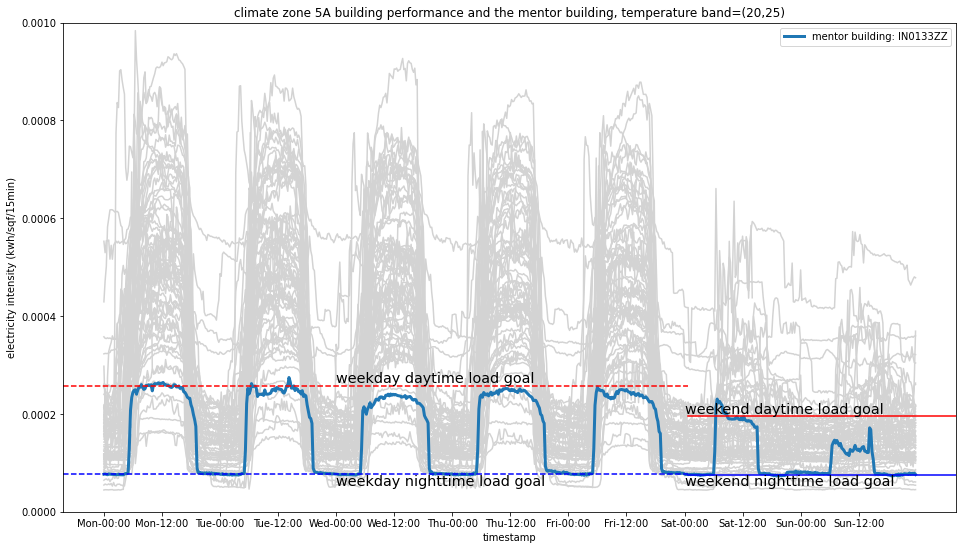

In [31]:
# illustration of setting electricity goal for temperature band, refering to the mentor building.

lo, hi = 20, 25

tmp = pd.read_csv(f'5A building average weekly performance/{lo}-{hi}.csv', parse_dates=True, index_col=0)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_ylim(0, 0.001)
ax.set_title(f'climate zone 5A building performance and the mentor building, temperature band=({lo},{hi})')
ax.set_ylabel('electricity intensity (kwh/sqf/15min)')
ax.set_xlabel('timestamp')
ax.set_xticks(np.arange(0, 672, 48))

mentors = []
for rank, c in enumerate(concat_overall_perf.sort_values().index.to_list()):
    tmp[c].plot(ax = ax, color='lightgrey')

    
tmp[mentor].plot(ax = ax, legend = True, label=f'mentor building: {mentor}', linewidth=3)

ax.axhline(y=tmp[mentor][:96*5].quantile(0.95), color='r', linestyle='--', xmax=0.7)
ax.text(s = 'weekday daytime load goal',x=96*2, y=tmp[mentor][:96*5].quantile(0.95) * 1.03, fontsize='x-large')

ax.axhline(y=tmp[mentor][:96*5].quantile(0.15), color='b', linestyle='--', xmax=0.7)
ax.text(s = 'weekday nighttime load goal',x=96*2, y=tmp[mentor][:96*5].quantile(0.15) * 0.70, fontsize='x-large')

ax.axhline(y=tmp[mentor][96*5:96*7].quantile(0.95), color='r', linestyle='-', xmin=0.7, xmax=1)
ax.text(s = 'weekend daytime load goal',x=96*5, y=tmp[mentor][96*5:96*7].quantile(0.95) * 1.03, fontsize='x-large')

ax.axhline(y=tmp[mentor][96*5:96*7].quantile(0.15), color='b', linestyle='-', xmin=0.7, xmax=1)
ax.text(s = 'weekend nighttime load goal',x=96*5, y=tmp[mentor][96*5:96*7].quantile(0.15) * 0.70, fontsize='x-large')

## 5.4.2 Establishing the regional mentor building in ASHRAE climate zone 5A can help 69 GSA buildings in that climate zone save 117M kWh electricity per year, an average of 1.7M kWh/building.


In [35]:
# calculate the elctricity saving for each temperature band.
better_mentor = 'IN0133ZZ'
all_saving = []
tempBandDistribution = pd.concat(allbands, axis=1)
for (lo, hi) in [(-10,-5), (-5, 0), (0, 5), (5, 10), (10, 15), (15, 20), (20, 25), (25, 30), (30,35), (35,100)]:
    tmp = pd.read_csv(f'5A building average weekly performance/{lo}-{hi}.csv', parse_dates=True, index_col=0)
    base = tmp[better_mentor].copy()
    diff = tmp.copy()
    # eui difference.
    for c in tmp.columns:
        diff[c] = tmp[c] - base
    # delete non-saving values.
    diff = diff[diff >= 0]
    # one-time weekly temperature band eui saving.
    saving = diff.sum()
    # one-time weekly temperature band electricity saving. (x floor area)
    for c in saving.index:
        saving[c] *= profiles.loc[c].Area

    # total weekly temperature band electricity saving. (occurance in a year)
    for c in saving.index:
        saving[c] *= tempBandDistribution[c].loc[f'{lo}-{hi}']
    saving = saving.rename(f'{lo}-{hi}')
    all_saving.append(saving)

In [36]:
wholeYearSaving_5A = pd.concat(all_saving, axis = 1)

In [37]:
wholeYearSaving_5A

,-10--5,-5-0,0-5,5-10,10-15,15-20,20-25,25-30,30-35,35-100
CT0013ZZ,0.000000,23613.485147,43078.614345,26757.904198,8657.700517,37664.920620,1.107785e+05,10173.501544,0.0,0.0
CT0024ZZ,5818.252951,11937.495248,84262.545552,46963.157061,19598.798417,38317.679662,5.814818e+04,24955.655369,0.0,0.0
CT0053ZZ,0.000000,720.602970,1922.266852,2921.227739,938.875304,155.132719,3.626208e+03,244.986440,0.0,0.0
CT0059ZZ,15031.293488,25530.352811,160296.789500,82813.792962,38255.335055,77641.587099,1.200416e+05,53871.034491,0.0,0.0
CT0061ZZ,0.000000,21062.261194,228813.825051,132218.389777,68420.448733,139230.143713,2.674506e+05,135292.693787,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
PA0158ZZ,0.000000,261036.186646,304297.572123,146974.619601,76267.814941,226901.505405,6.445201e+05,37977.974647,0.0,0.0
PA0233ZZ,0.000000,478060.531493,705604.987755,389034.350274,213221.880936,397551.947282,1.503848e+06,103965.307364,0.0,0.0
PA0267ZZ,0.000000,81416.318472,351244.922173,191707.218304,119881.803604,191737.033566,4.904293e+05,167942.409395,0.0,0.0
RI0009ZZ,0.000000,16565.194473,96919.483491,30123.309221,10146.667058,37999.770597,4.804284e+04,7512.308315,0.0,0.0


In [52]:
originalConsmp = pd.concat(originals, axis = 1)

In [57]:
originalConsmp.sum().sum()

236863993.79763454

In [58]:
tmp = pd.read_csv('290 buildings electricity consumption.csv', parse_dates=True, index_col=0)

In [68]:
tmp[bldgs_5A].sum().sum()

210338482.994

In [70]:
wholeYearSaving_5A.sum().sum() / originalConsmp.sum().sum() * 100

49.45464030713382

In [44]:
import matplotlib as mpl

No handles with labels found to put in legend.


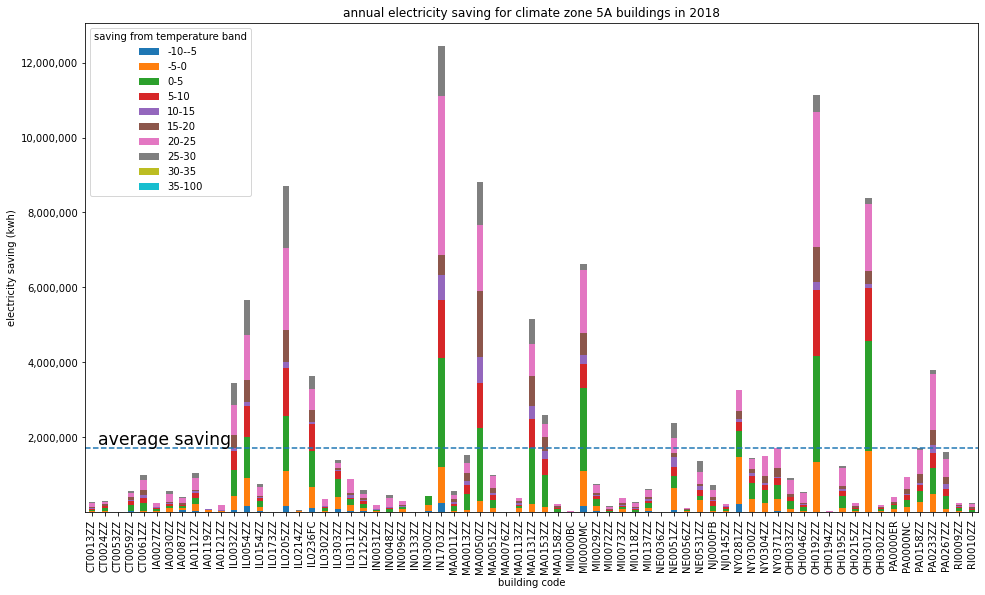

In [133]:
# visualization of electricity savings.

fig = plt.figure()
ax = fig.add_subplot(111)

ax.set_title('annual electricity saving for climate zone 5A buildings in 2018')
ax.set_ylabel('electricity saving (kwh)')
ax.set_xlabel('building code')

ax.legend(ncol=2, title="saving from temperature band")

wholeYearSaving_5A.plot.bar(ax=ax, stacked=True)

ax.axhline(1697684, linestyle='--')
ax.text(0.5, 1800000, 'average saving', fontsize='xx-large')
ax.ticklabel_format(useOffset=False, style='plain', axis='y')
ax.get_yaxis().set_major_formatter(
    mpl.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

In [17]:
# sort the buildings according to GSA region and total electricity saving.

In [30]:
# gsa region ref: https://www.gsa.gov/about-us/gsa-regions
# ashrae climate zone ref: http://www.iaqsource.com/article.php/ashrae-climate-zone-map/?id=194
gsa_1 = ['VT', 'RI', 'NH', 'MA', 'ME', 'CT']
gsa_2 = ['NY', 'NJ', 'PR', 'VI'] # vi = virgin islands.
gsa_3 = ['VA', 'PA', 'MD', 'DE', 'WV']
gsa_4 = ['NC', 'TN', 'SC', 'MS', 'KY', 'GA', 'FL', 'AL']
gsa_5 = ['IL', 'IN', 'MI', 'MN', 'OH', 'WI']
gsa_6 = ['NE', 'KS', 'MO', 'IA']
gsa_7 = ['AR', 'NM', 'LA', 'OK', 'TX']
gsa_8 = ['WY', 'UT', 'SD', 'ND', 'MT', 'CO']
gsa_9 = ['NV', 'HI', 'CA', 'AZ']
gsa_10 = ['ID', 'WA', 'OR', 'AK']
gsa_11 = ['DC']

states = gsa_1 + gsa_2 + gsa_3 + gsa_4 + gsa_5 + gsa_6 + gsa_7 + gsa_8 + gsa_9 + gsa_10 + gsa_11

stateMaptoGSAregion = {}
for state in states:
    if state in gsa_1:
        stateMaptoGSAregion[state] = 1
    elif state in gsa_2:
        stateMaptoGSAregion[state] = 2
    elif state in gsa_3:
        stateMaptoGSAregion[state] = 3
    elif state in gsa_4:
        stateMaptoGSAregion[state] = 4
    elif state in gsa_5:
        stateMaptoGSAregion[state] = 5
    elif state in gsa_6:
        stateMaptoGSAregion[state] = 6
    elif state in gsa_7:
        stateMaptoGSAregion[state] = 7
    elif state in gsa_8:
        stateMaptoGSAregion[state] = 8
    elif state in gsa_9:
        stateMaptoGSAregion[state] = 9
    elif state in gsa_10:
        stateMaptoGSAregion[state] = 10
    else:
        stateMaptoGSAregion[state] = 11

        
GSAregions = [stateMaptoGSAregion[state] for state in wholeYearSaving_5A.index.str[:2]]

In [33]:
wholeYearSaving_5A['gsa'] = GSAregions

In [15]:
wholeYearSaving_5A['total'] = wholeYearSaving_5A.sum(axis=1)

No handles with labels found to put in legend.


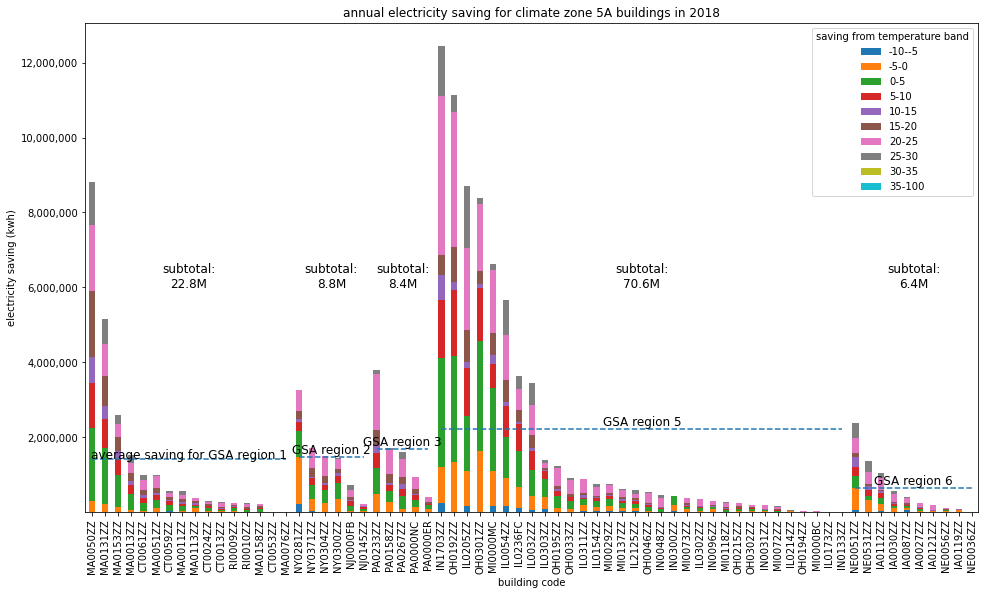

In [97]:
# visualization of electricity savings, additional knowledge for GSA region savings.

fig, ax = plt.subplots()

ax.set_title('annual electricity saving for climate zone 5A buildings in 2018')
ax.set_ylabel('electricity saving (kwh)')
ax.set_xlabel('building code')

ax.legend(ncol=2, title="saving from temperature band")


sorted_wholeYearSaving_5A = wholeYearSaving_5A.sort_values(['gsa','total'], ascending = [True, False])
sorted_wholeYearSaving_5A.drop(columns=['total','gsa']).plot.bar(ax=ax, stacked=True)


# ax.axhline(1697684, linestyle='--')
# ax.text(45, 1800000, 'average saving', fontsize='xx-large')
ax.ticklabel_format(useOffset=False, style='plain', axis='y')
ax.get_yaxis().set_major_formatter(
    mpl.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

vals = [sorted_wholeYearSaving_5A[sorted_wholeYearSaving_5A.gsa == sorted_wholeYearSaving_5A.gsa.unique()[i]].total.mean() for i in range(len(tmp.gsa.unique()))]
xmins = [0, 16, 22, 27, 59]
xmaxs = [15, 21, 26, 58, 68]
ax.hlines(y = vals, xmin = xmins, xmax = xmaxs, linestyles = 'dashed')


ax.text((xmins[0] + xmaxs[0]) / 2, vals[0], 'average saving for GSA region 1', fontsize='large', ha='center')
for i in range(1, len(sorted_wholeYearSaving_5A.gsa.unique())):
    ax.text((xmins[i] + xmaxs[i]) / 2, vals[i] + 100_000, f'GSA region {sorted_wholeYearSaving_5A.gsa.unique()[i]}', fontsize='large', ha='center')
  
# ax.vlines(x = xmaxs, ymin=[0]*5, ymax=[12_000_000]*5)

subtotals = ['22.8M', '8.8M', '8.4M', '70.6M', '6.4M']
    
for i in range(len(sorted_wholeYearSaving_5A.gsa.unique())):
    ax.text((xmins[i] + xmaxs[i]) / 2, 6_000_000, f'subtotal:\n{subtotals[i]}', fontsize='large', ha='center')